In [1]:
#Text to image generation using stable diffusion and diffusers
#Diffusion model - Image from the text we need to use diffusion model

!pip install diffusers transformers accelerate


In [2]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
!pip show torch

Name: torch
Version: 2.4.1+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: accelerate, fastai, timm, torchaudio, torchvision


In [4]:
model_id1 = 'dreamlike-art/dreamlike-diffusion-1.0' #diffusion model 1
model_id2 = 'stabilityai/stable-diffusion-xl-base-1.0' #diffusion model 2

pipe = StableDiffusionPipeline.from_pretrained(model_id1,torch_dtype=torch.float16, use_safetensors=True)
pipe = pipe.to('cuda')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [5]:
prompt = """dream like a sky, achieve like a rocket, travelling like a aeroplane, strong like a train, sturdy like a ship and comapct like a car"""

In [7]:
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]: dream like a sky, achieve like a rocket, travelling like a aeroplane, strong like a train, sturdy like a ship and comapct like a car


(-0.5, 639.5, 639.5, -0.5)

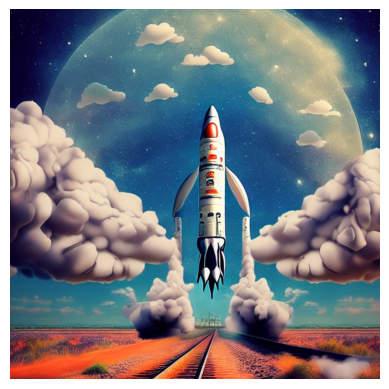

In [8]:
print("[PROMPT]:",prompt)
plt.imshow(image);
plt.axis('off')

In [17]:
prompt2 = "A man is sitting at the top of the grrenary mountain and enjoy the amazing nature"

In [18]:
image1 = pipe(prompt2).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]: A man is sitting at the top of the grrenary mountain and enjoy the amazing nature


(-0.5, 639.5, 639.5, -0.5)

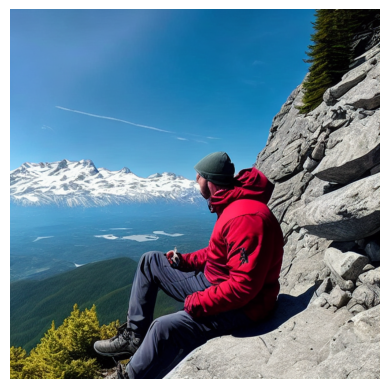

In [19]:
print("[PROMPT]:",prompt2)
plt.imshow(image1);
plt.axis('off')

In [20]:
#Parameters of the diffusion model
#1.Negative prompting
#2.num_inference_steps
#3.height
#4.weight
#5.num_images_per_prompt

In [21]:
def generate_image(pipe,prompt,params):
  img = pipe(prompt,**params).images

  num_images = len(img)
  if num_images>1:
    fig,ax = plt.subplots(nrows=1,ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(img[i]);
      ax[i].axis('off');

  else:
    fig = plt.figure()
    plt.imshow(img[0]);
    plt.axis('off');
    plt.tight_layout()

In [24]:
prompt_user = "universe in the sky"

params = {}

  0%|          | 0/50 [00:00<?, ?it/s]

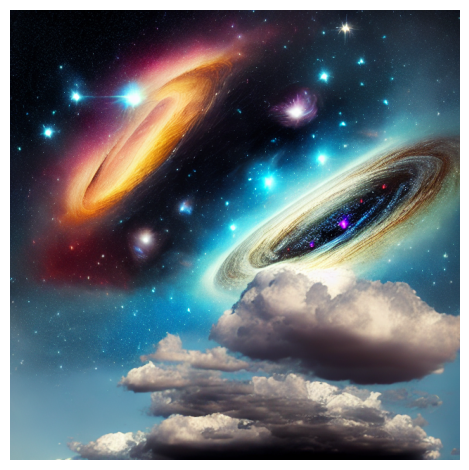

In [25]:
generate_image(pipe, prompt_user,params)

  0%|          | 0/100 [00:00<?, ?it/s]

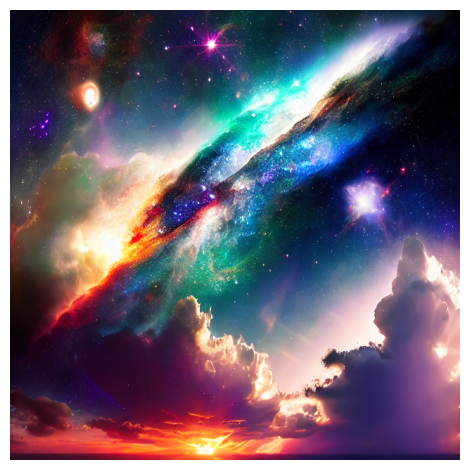

In [26]:
#Lets increase the inference steps
params = {'num_inference_steps':100}

generate_image(pipe, prompt_user, params)

  0%|          | 0/10 [00:00<?, ?it/s]

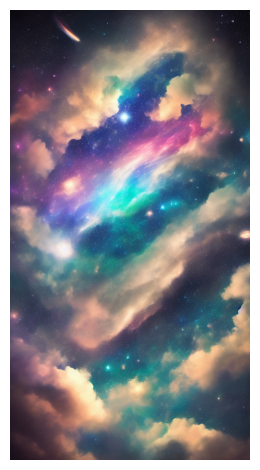

In [27]:
#height and width
params = {'num_inference_steps':10, 'width':512, 'height':int(1.5*640)}

generate_image(pipe, prompt_user, params)

  0%|          | 0/10 [00:00<?, ?it/s]

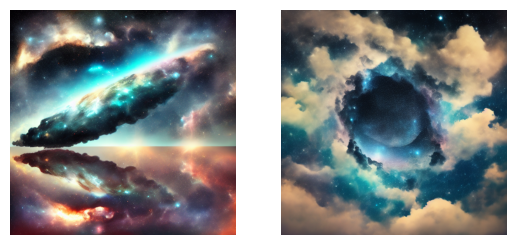

In [28]:
#number of images per prompt
params = {'num_inference_steps':10, 'num_images_per_prompt':2}
generate_image(pipe, prompt_user, params)

  0%|          | 0/10 [00:00<?, ?it/s]

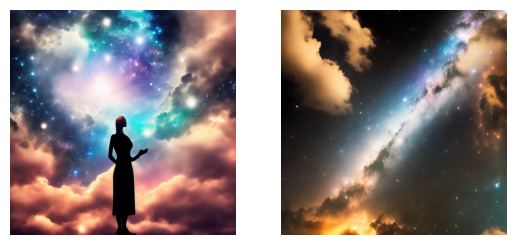

In [29]:
#negative prompt
params = {'num_inference_steps':10,'num_images_per_prompt':2,'negative_prompt':'ugly,distorted,low quality'}
generate_image(pipe,prompt_user,params)